# Clustering

### What is clustering?  
Clustering is a unsupervised learning technique used to group objects into clusters taking into consideration their similarities.

### Types of clustering algorithms  
- K-Means clustering
- Spectral clustering 
- Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
- Hierarchical clustering

### Application on toy examples

In [1]:
# Import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN

In [2]:
%matplotlib inline

In [3]:
# Create dataset: Two concentric circles
def create_circles(n=100):
    features = []
    labels = []
    for i in range(n//2):
        t = 2*np.pi * i/(n//2)
        x, y = np.cos(t), np.sin(t)
        x, y = x+np.random.normal(0, .2), y+np.random.normal(0, .2)
        features.append([x, y])
        labels.append(0)
    for i in range(n//2, n):
        t = 2*np.pi * (i-n//2)/(n//2)
        x, y = 3*np.cos(t), 3*np.sin(t)
        x, y = x+np.random.normal(0, .2), y+np.random.normal(0, .2)
        features.append([x, y])
        labels.append(1)
    features = pd.DataFrame(features, columns=['x', 'y'])
    labels = pd.DataFrame(labels, columns=['label'])
    return features, labels

In [4]:
# Create dataset: Two blobs
def create_blobs(n=100):
    features = []
    labels = []
    for i in range(n//2):
        x, y = 1.5, 1.5
        x, y = x+np.random.normal(0, .5), y+np.random.normal(0, .5)
        features.append([x, y])
        labels.append(0)
    for i in range(n//2, n):
        x, y = -1.5, -1.5
        x, y = x+np.random.normal(0, .5), y+np.random.normal(0, .5)
        features.append([x, y])
        labels.append(1)
    features = pd.DataFrame(features, columns=['x', 'y'])
    labels = pd.DataFrame(labels, columns=['label'])
    return features, labels

In [5]:
dataset1 = create_circles(500)
dataset2 = create_blobs(500)

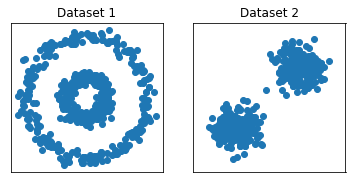

In [6]:
# PLot data points
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
ax1.scatter(dataset1[0]['x'] , dataset1[0]['y'])
ax1.set_title('Dataset 1')
ax1.set_aspect('equal')
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
ax2.scatter(dataset2[0]['x'] , dataset2[0]['y'])
ax2.set_title('Dataset 2')
ax2.set_aspect('equal')
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
plt.show()

The next step is using clustering algorithms found in the `sklearn` library. We will be comparing two algorithms: 
* the `Kmeans` algorithm which uses the more general Lloyd's algorithm
* the `DBSCAN` algorithm which is a density-based clustering algorithm 

In [7]:
models = [KMeans(n_clusters=2), DBSCAN()]

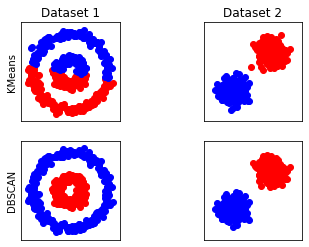

In [8]:
f, ax = plt.subplots(2, 2, sharex=True, sharey=True)
for model_idx, model in enumerate(models) :
    datasets = [dataset1, dataset2]
    for dataset_idx, dataset in enumerate(datasets):
        # Fit model
        labels = model.fit_predict(dataset[0])  
        first_class = dataset[0][labels==0]
        second_class = dataset[0][labels==1]
        # Display results
        ax[model_idx][dataset_idx].scatter(first_class['x'] , first_class['y'] , color = 'red')
        ax[model_idx][dataset_idx].scatter(second_class['x'] , second_class['y'] , color = 'blue')
        if model_idx == 0:
            ax[model_idx][dataset_idx].set_title('Dataset '+ str(dataset_idx+1))
        if dataset_idx == 0:
             ax[model_idx][dataset_idx].set_ylabel(type(model).__name__)
        ax[model_idx][dataset_idx].set_aspect('equal')
        ax[model_idx][dataset_idx].tick_params(bottom=False, left=False, labelbottom=False, labelleft=False) 

The `KMeans` algorithm performs better on `Dataset 2`. A problem of the `KMeans` algorithm is that it results in linear decision boundaries.
The `DBSCAN` algorithm performs well on both datasets. An advantage of DBSCAN is that we don't need to specify the number of clusters beforehand.

### Application on real medical data

For this section, we will use the UCI ML [Breast Cancer Wisconsin (Diagnostic) dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). The fields represent characteristics of the cell nuclei of breast tissue. The original dataset was initially used for classification, as groundtruth labels were provided for each entry (Malignant 1/Benign 0).

In [9]:
from sklearn.datasets import load_breast_cancer

In [10]:
data = load_breast_cancer(as_frame=True)
df = data.frame

In [11]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [13]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

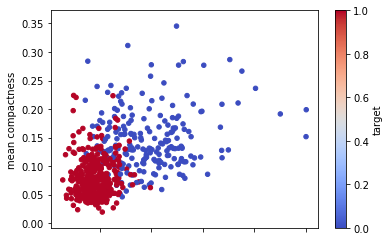

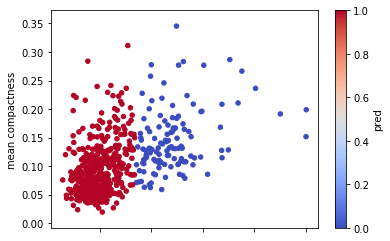

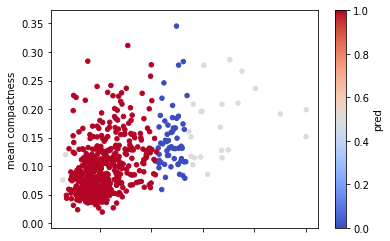

In [14]:
# Train on the first 10 features and visualize results for 2 features
x1 = 'mean area'
x2 = 'mean compactness'
df.plot.scatter(x=x1, y=x2, c='target', colormap='coolwarm');
models = [KMeans(n_clusters=2), DBSCAN(eps=50, min_samples=20)]
for model in models:
    y_true = df['target']
    y_pred = model.fit_predict(df.iloc[:,:10]) # Using only a subset of features for training
    new_df = df.drop(columns='target')
    new_df['pred'] = y_pred
    new_df['pred'] = new_df['pred'].replace(-1, .5) # How to deal with noisy points from DBSCAN 
    new_df.plot.scatter(x=x1, y=x2, c='pred', colormap='coolwarm');

### References :
[1](https://www.springer.com/gp/book/9780387310732) C. M. Bishop, Pattern Recognition and Machine Learning. Berlin, Germany: Springer, 2006.  
[2](https://www-users.cs.umn.edu/~kumar001/dmbook/index.php) P. N. Tan, M. Steinbach and V. Kumar, Introduction to data mining, 2nd ed. New York, USA: Pearson Education, 2019.